# 加载MNIST数据集

In [1]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data('F:/demo/tensorflow/mnistcnn/mnist/mnist.npz')

Using TensorFlow backend.


In [4]:
print(x_train.shape,type(x_train))
print(y_train.shape,type(y_train))

(60000, 28, 28) <class 'numpy.ndarray'>
(60000,) <class 'numpy.ndarray'>


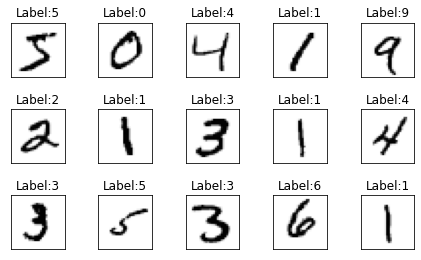

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1) # 绘制前15个手写体数字，以3行5列子图形式展示
    plt.tight_layout() # 自动适配子图尺寸
    plt.imshow(x_train[i],cmap="Greys") # 使用灰色显示像素灰度值
    plt.title("Label:{}".format(y_train[i])) # 设置标签为子图标题
    plt.xticks([]) # 删除x轴标记
    plt.yticks([]) # 删除y轴标记

# 数据处理：规范化

In [6]:
# 将图像本身从[28,28],转化为[784,]
X_train = x_train.reshape(60000,784)
X_test = x_test.reshape(10000,784)
print(X_train.shape,type(X_train))
print(X_test.shape,type(X_test))

(60000, 784) <class 'numpy.ndarray'>
(10000, 784) <class 'numpy.ndarray'>


In [7]:
#将数据类型转换为float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# 数据归一化
X_train /=255
X_test /= 255

# 统计训练数据中各标签数量

In [9]:
import numpy as np
import matplotlib.pyplot as plt

label,count = np.unique(y_train,return_counts=True)
print(label,count)

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


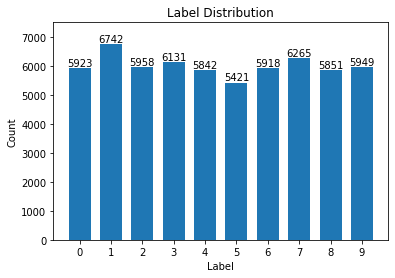

In [11]:
fig = plt.figure()
plt.bar(label,count,width=0.7,align='center')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(label)
plt.ylim(0,7500)

for a,b in zip(label,count):
    plt.text(a,b,'%d'% b,ha='center',va = 'bottom',fontsize = 10)

plt.show()

# 数据处理：one-hot编码

## 几种编码方式对比

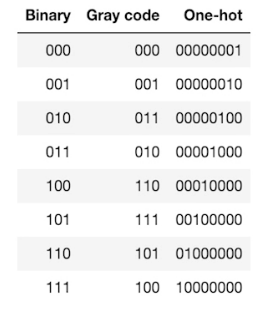

one-hot应用

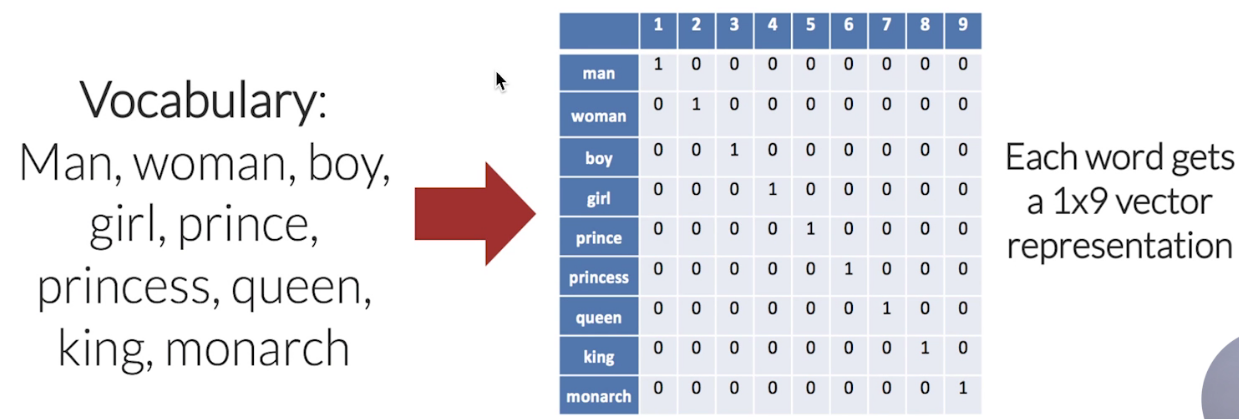

In [13]:
from keras.utils import np_utils

n_classes = 10
print("Shape before one-hot encoding:",y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_classes)
print("Shape after one-hot encoding:",Y_train.shape)
Y_test = np_utils.to_categorical(y_test,n_classes)

Shape before one-hot encoding: (60000,)
Shape after one-hot encoding: (60000, 10)


# 使用Keras sequential model 定义神经网络

## softmax网络层

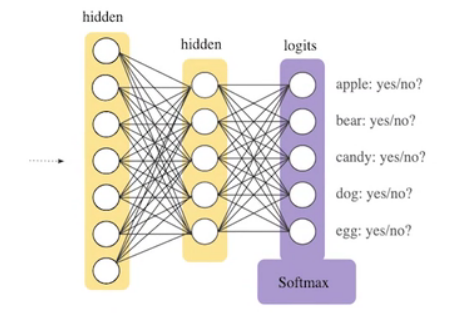

In [14]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation

model = Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

# 编译模型

compile(optimize,loss=None,metrics=None,loss_weights = None,sample_weight_mode=None,weighted_metrics=None,target_tensors=None)

In [16]:
model.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer='adam')

## 训练模型，并将指标保存到history中

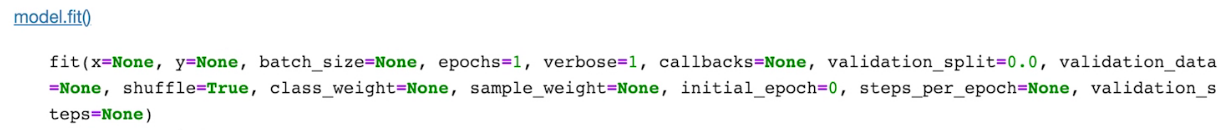

In [19]:
history = model.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=5,
                    verbose=2,
                    validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/5





 - 3s - loss: 0.2183 - acc: 0.9351 - val_loss: 0.0915 - val_acc: 0.9717
Epoch 2/5
 - 3s - loss: 0.0800 - acc: 0.9754 - val_loss: 0.0917 - val_acc: 0.9696
Epoch 3/5
 - 3s - loss: 0.0501 - acc: 0.9839 - val_loss: 0.0603 - val_acc: 0.9807
Epoch 4/5
 - 3s - loss: 0.0378 - acc: 0.9878 - val_loss: 0.0687 - val_acc: 0.9819
Epoch 5/5
 - 3s - loss: 0.0261 - acc: 0.9920 - val_loss: 0.0737 - val_acc: 0.9792


# 可视化指标

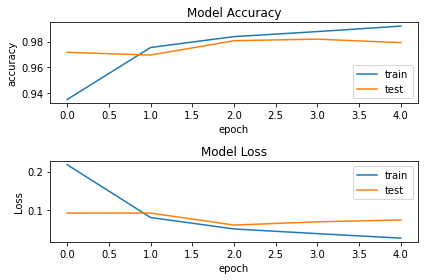

In [20]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.tight_layout()

plt.show()

# 模型保存

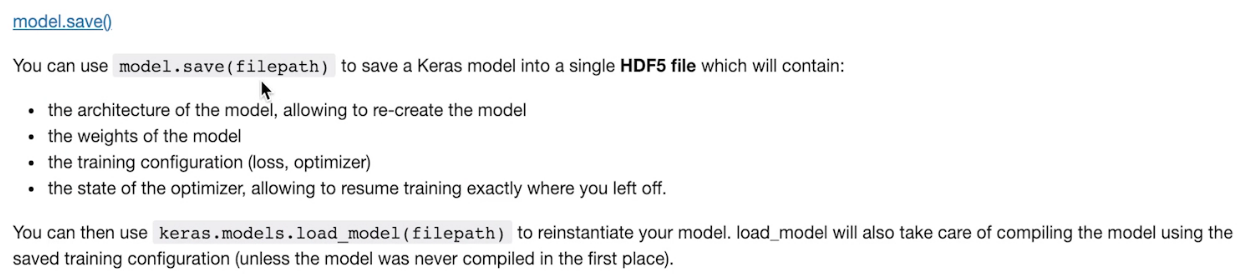

In [22]:
import os
import tensorflow.gfile as gfile

save_dir = "F:/demo/tensorflow/mnistcnn/model"

if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)

model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir,model_name)
model.save(model_path)
print("Saved trained model at %s" %model_path)


Saved trained model at F:/demo/tensorflow/mnistcnn/model\keras_mnist.h5


# 加载模型

In [23]:
from keras.models import load_model
mnist_model = load_model(model_path)

# 统计模型在测试集上的分类结果

In [28]:
loss_and_metrics = mnist_model.evaluate(X_test,Y_test,verbose=2)

print("Test Loss:{}".format(loss_and_metrics[0]))
print("Test Accuracy:{}%".format(loss_and_metrics[1]*100))

predicted_classes = mnist_model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("Classified correctly count:{}".format(len(correct_indices)))
print("Classified incorrectly count:{}".format(len(incorrect_indices)))

Test Loss:0.07365630822659587
Test Accuracy:97.92%
Classified correctly count:9792
Classified incorrectly count:208
